# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df_Mark = pd.read_excel("C:\\Users\\SARVESH SURVE\\Onedrive\\Desktop\\data\\Excelr.dataset\\marketing_campaign1 (1).xlsx")

In [3]:
df_Mark.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# DATA CLEANING

In [4]:
df_Mark.shape

(2240, 29)

In [5]:
df_Mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
df_Mark.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df_Mark.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [8]:
df_Mark.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Imputing missing values with the mean
mean_income = np.mean(df_Mark['Income'])
df_Mark['Income'].fillna(mean_income, inplace=True)

In [10]:
#To remove the NA values
df_Mark = df_Mark.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df_Mark))

The total number of data-points after removing the rows with missing values are: 2240


In [11]:
df_Mark.duplicated().sum()

0

In [12]:
df_Mark["Dt_Customer"] = pd.to_datetime(df_Mark["Dt_Customer"])
dates = []
for i in df_Mark["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [13]:
 #Feature Engineering
current_year = datetime.datetime.now().year
df_Mark['Age'] = current_year - df_Mark['Year_Birth']

* **creating a new feature called "Age" by subtracting the "Year_Birth" column from the current year. This helps in analyzing the customer's age and its relationship with other features in the dataset.**

In [14]:
df_Mark.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


In [15]:
#Droppig 'Year_Birth column'
df_Mark = df_Mark.drop(['Year_Birth'],axis = 1)

In [16]:
# Moving the Age column to the first position
age_col = df_Mark.pop('Age')
df_Mark.insert(0, 'Age', age_col)

In [17]:
df_Mark.head()

,Age,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,66,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,69,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,58,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,39,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,42,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [18]:
#Deriving living situation by marital status"Alone"
df_Mark["Living_With"]=df_Mark["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#Feature indicating total children living in the household
df_Mark["Children"]=df_Mark["Kidhome"]+df_Mark["Teenhome"]
#Segmenting education levels in three groups
df_Mark["Education"]=df_Mark["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
#For clarity
df_Mark=df_Mark.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"]
df_Mark = df_Mark.drop(to_drop, axis=1)

* **Deriving living situation by marital status, with "Alone" indicating customers who are not married, in a partnership, or a widow.**
* **Adding a feature indicating the total number of children living in the household by summing up "Kidhome" and "Teenhome".**
* **Segmenting education levels into three groups: "Undergraduate" for "Basic" and "2n Cycle", "Graduate" for "Graduation", and "Postgraduate" for "Master" and "PhD".**
* **Renaming some features for clarity: "MntWines" to "Wines", "MntFruits" to "Fruits", "MntMeatProducts" to "Meat", "MntFishProducts" to "Fish", "MntSweetProducts" to "Sweets", and "MntGoldProds" to "Gold".**
* **Dropping some of the redundant features, including "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", and "ID".**

In [19]:
df_Mark.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Children
0,66,Graduate,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,Alone,0
1,69,Graduate,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,Alone,2
2,58,Graduate,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,Partner,0
3,39,Graduate,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,Partner,1
4,42,Postgraduate,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,Partner,1


In [20]:
df_Mark['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [58]:
# define age category bins and labels
bins = [0, 40, 60, 130]
labels = ['Young Adult', 'Mid Age Adult', 'Older Adult']

# create age category column
df_Mark['age_category'] = pd.cut(df_Mark['Age'], bins=bins, labels=labels)

# view the updated dataframe
print(df_Mark[['age_category']])

       age_category
0       Older Adult
1       Older Adult
2     Mid Age Adult
3       Young Adult
4     Mid Age Adult
...             ...
2235  Mid Age Adult
2236    Older Adult
2237  Mid Age Adult
2238    Older Adult
2239    Older Adult

[2240 rows x 1 columns]


* **We defined age category bins and labels using the bins and labels variables. In this case, we set three age category bins: "Young Adult" for ages below 40, "Mid Age Adult" for ages between 40 and 60, and "Older Adult" for ages above 60.**
* **With this feature engineering step, we can now analyze our customers based on their age categories and how they relate to other features in the dataset.**

In [25]:
df_Mark.describe(include="all")

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Children,age_category
count,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3
top,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partner,NaN,Mid Age Adult
freq,NaN,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1444,NaN,1240
mean,54.194196,NaN,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,NaN,0.950446,NaN
std,11.984069,NaN,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,NaN,0.751803,NaN
min,27.000000,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,46.000000,NaN,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,53.000000,NaN,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,64.000000,NaN,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN


**The above stats show some discrepancies in mean Income and Age and max Income and age.
Do note that max-age is 130 years, As I calculated the age that would be today (i.e. 2023) and the data is old.
I must take a look at the broader view of the data. I will plot some of the selected features**

# **==============================================================================================================================**

# EDA 

# EDA On Demographic Information

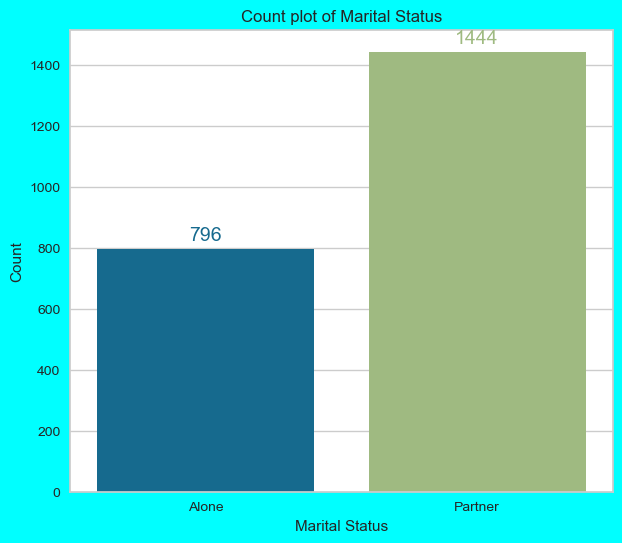

In [26]:
plt.figure(figsize=(7, 6),facecolor='cyan')
ax = sns.countplot(data=df_Mark, x='Living_With')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count plot of Marital Status')
plt.show()

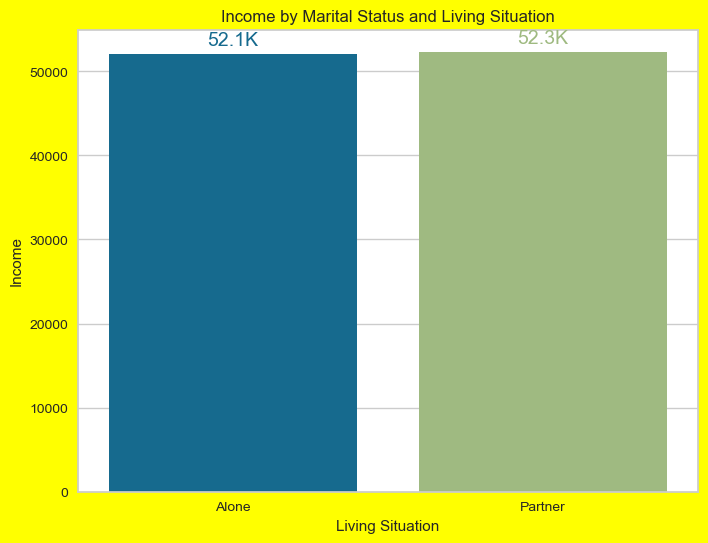

In [27]:
plt.figure(figsize=(8,6),facecolor='Yellow')
ax=sns.barplot(data=df_Mark, x='Living_With', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Income by Marital Status and Living Situation')
plt.xlabel('Living Situation')
plt.ylabel('Income')
plt.show()

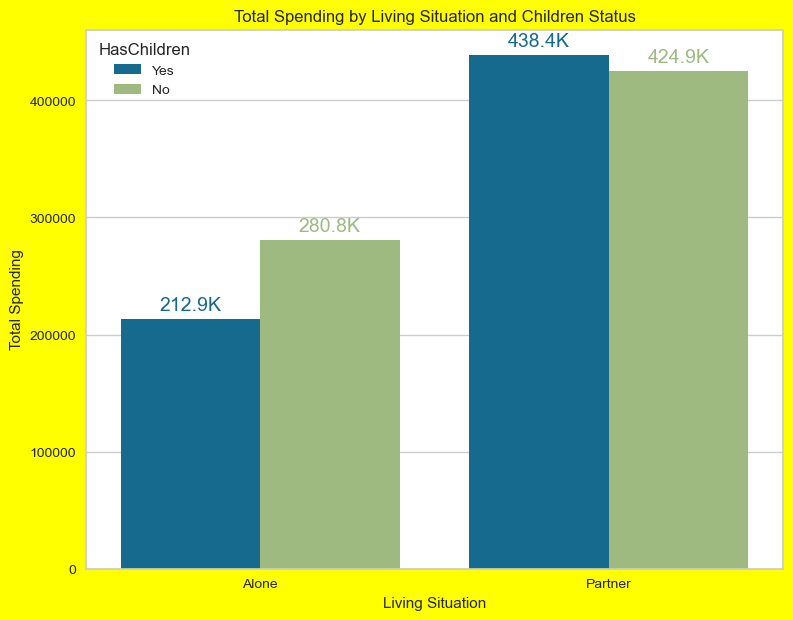

In [28]:
df_Mark['TotalSpent'] = df_Mark['Wines'] + df_Mark['Fruits'] + df_Mark['Meat'] + df_Mark['Fish'] + df_Mark['Sweets'] + df_Mark['Gold']

# Creating a dataframe of those who have children
have_children = df_Mark[df_Mark['Children'] > 0]
have_children['HasChildren'] = 'Yes'

# Calculating the total spent by those who have children
have_children_spending = have_children.groupby(['Living_With', 'HasChildren'])['TotalSpent'].sum().reset_index()

# Creating a dataframe of those who don't have children
no_children = df_Mark[df_Mark['Children'] == 0]
no_children['HasChildren'] = 'No'

# Calculating the total spent by those who don't have children
no_children_spending = no_children.groupby(['Living_With', 'HasChildren'])['TotalSpent'].sum().reset_index()

# Concatenating the two dataframes
spending_comparison = pd.concat([have_children_spending, no_children_spending])

fig = plt.figure(figsize=(9,7),facecolor='yellow')
ax = sns.barplot(data=spending_comparison, x='Living_With', y='TotalSpent', hue='HasChildren')
for p in ax.patches:
    ax.annotate('{:.1f}{}'.format(p.get_height() / 1000, 'K'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.title('Total Spending by Living Situation and Children Status')
plt.xlabel('Living Situation')
plt.ylabel('Total Spending')

plt.show()

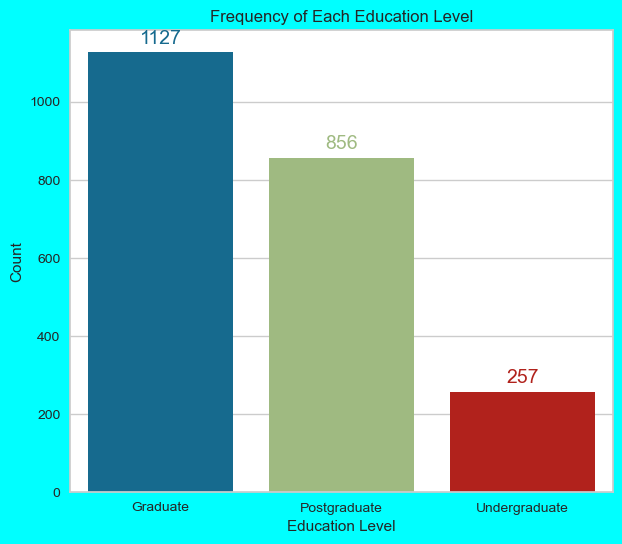

In [29]:
plt.figure(figsize=(7, 6),facecolor='cyan')
ax = sns.countplot(data=df_Mark, x='Education')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
    
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Frequency of Each Education Level')
plt.show()

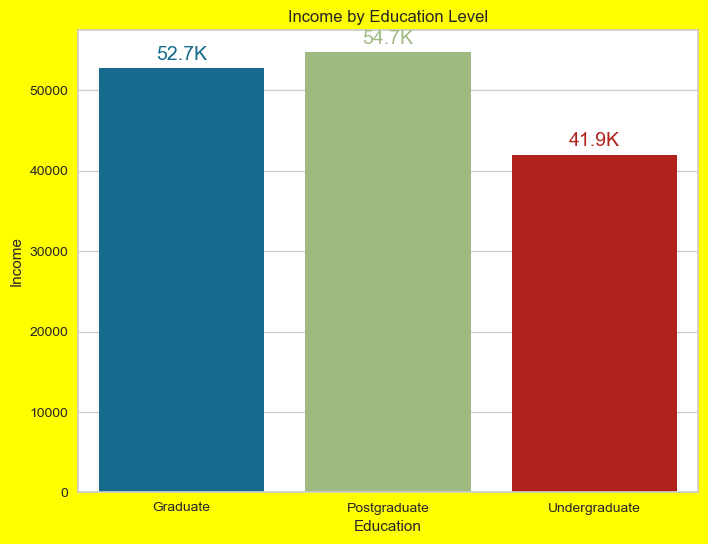

In [30]:
plt.figure(figsize=(8,6),facecolor='Yellow')
ax=sns.barplot(data=df_Mark, x='Education', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

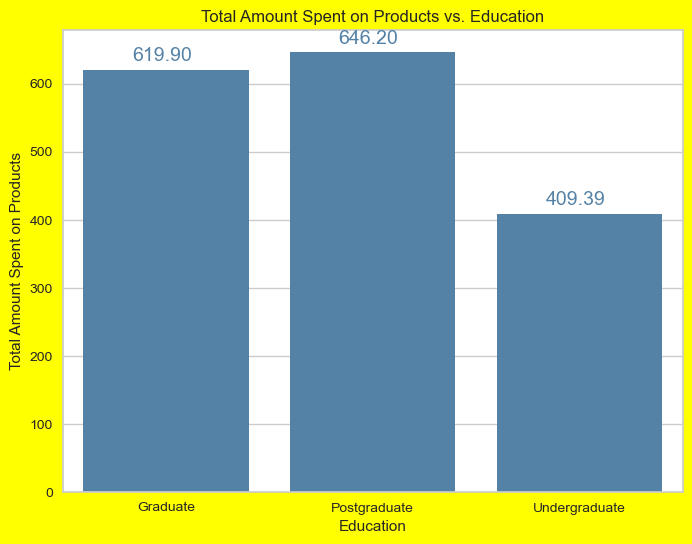

In [31]:
figure = plt.figure(figsize=(8,6),facecolor='yellow')
ax = sns.barplot(x='Education', y='TotalSpent', data=df_Mark, ci=None, color='steelblue')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Total Amount Spent on Products vs. Education')
plt.xlabel('Education')
plt.ylabel('Total Amount Spent on Products')
plt.show()

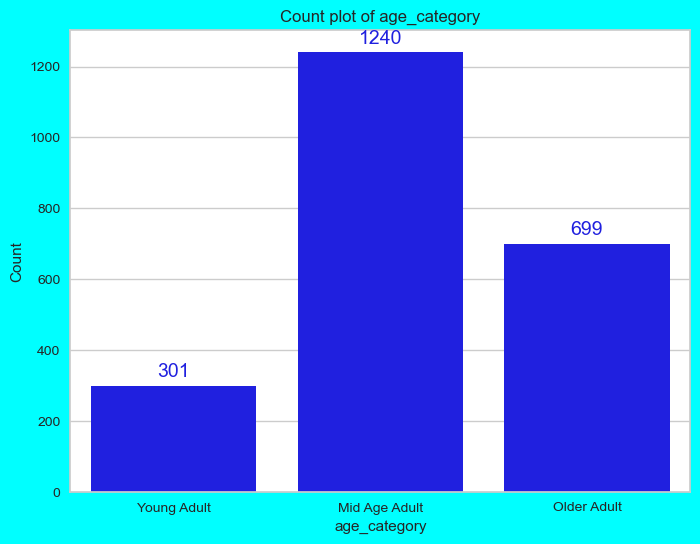

In [32]:
plt.figure(figsize=(8, 6),facecolor='cyan')
ax = sns.countplot(data=df_Mark, x='age_category',color='blue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('age_category')
plt.ylabel('Count')
plt.title('Count plot of age_category')

plt.show()

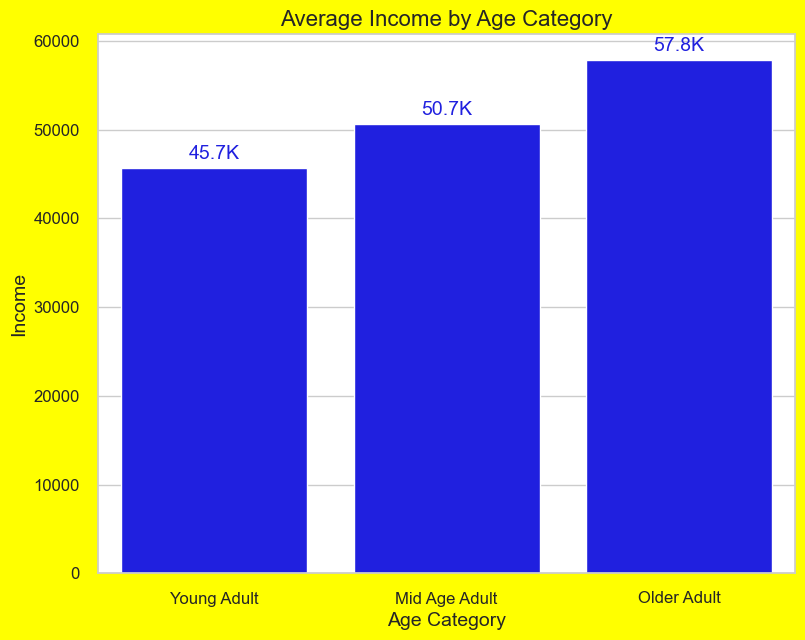

In [33]:
income_by_age = df_Mark.groupby('age_category')['Income'].mean()

plt.figure(figsize=(9,7), facecolor='Yellow')
sns.set(style='whitegrid')
ax = sns.barplot(x=income_by_age.index, y=income_by_age.values, color='blue')
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average Income by Age Category', fontsize=16)
plt.show()

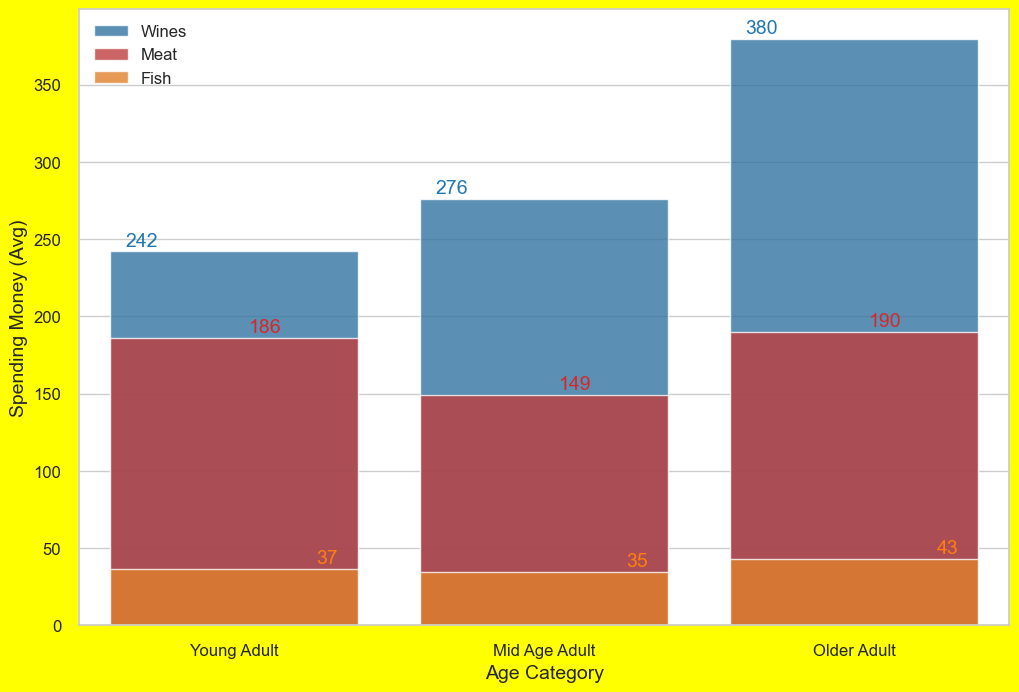

In [34]:
# group data by age category and calculat the mean spending money
spending_money = df_Mark.groupby('age_category')[['Wines','Meat', 'Fish']].mean()


sns.set(style='whitegrid')
plt.figure(figsize=(12,8),facecolor='yellow')
ax = sns.barplot(x=spending_money.index, y=spending_money['Wines'], color='#1f77b4', alpha=0.8, label='Wines')
sns.barplot(x=spending_money.index, y=spending_money['Meat'], color='#d62728', alpha=0.8, label='Meat')
sns.barplot(x=spending_money.index, y=spending_money['Fish'], color='#ff7f0e', alpha=0.8, label='Fish')
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Spending Money (Avg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)

for i, v in enumerate(spending_money['Wines']):
    ax.text(i-0.3, v+1, str(round(v)), ha='center', va='bottom', fontsize=14,color='#1f77b4')
for i, v in enumerate(spending_money['Meat']):
    ax.text(i+0.1, v+1, str(round(v)), ha='center', va='bottom', fontsize=14,color='#d62728')
for i, v in enumerate(spending_money['Fish']):
    ax.text(i+0.3, v+1, str(round(v)), ha='center', va='bottom', fontsize=14,color='#ff7f0e')

plt.show()

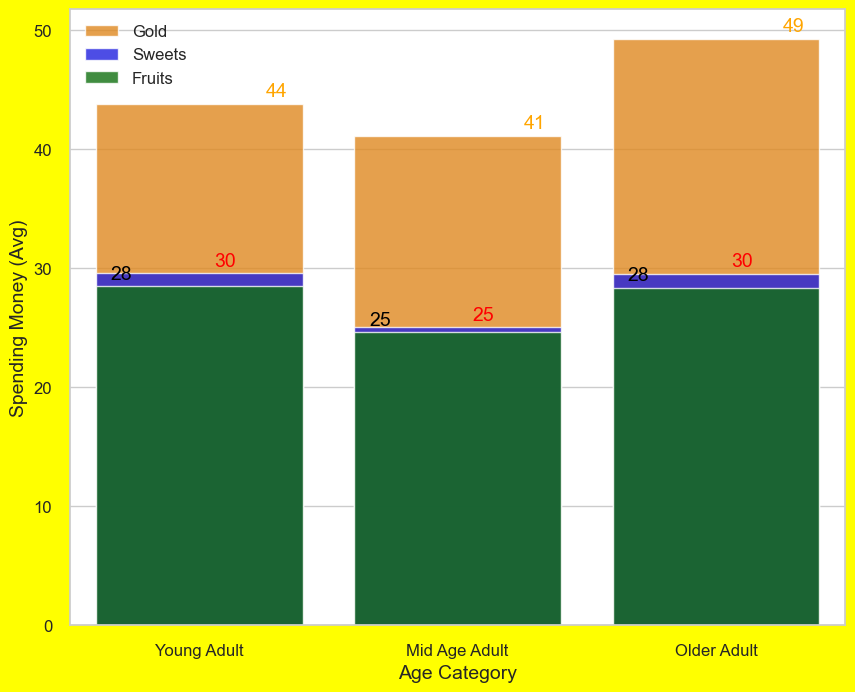

In [35]:
spending_money = df_Mark.groupby('age_category')[['Fruits','Sweets', 'Gold']].mean()

sns.set(style='whitegrid')
plt.figure(figsize=(10,8),facecolor='yellow')
ax=sns.barplot(x=spending_money.index, y=spending_money['Gold'], color='Darkorange', alpha=0.8, label='Gold')
sns.barplot(x=spending_money.index, y=spending_money['Sweets'], color='blue', alpha=0.8, label='Sweets')
sns.barplot(x=spending_money.index, y=spending_money['Fruits'], color='green', alpha=0.8, label='Fruits')
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Spending Money (Avg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)


for i, v in enumerate(spending_money['Fruits']):
    ax.text(i-0.3, v+1, str(round(v)), ha='center', va='center', fontsize=14,color='black')
for i, v in enumerate(spending_money['Sweets']):
    ax.text(i+0.1, v+1, str(round(v)), ha='center', va='center', fontsize=14,color='red')
for i, v in enumerate(spending_money['Gold']):
    ax.text(i+0.3, v+1, str(round(v)), ha='center', va='center', fontsize=14,color='orange')

plt.show()

# __Behavioral Attributes__

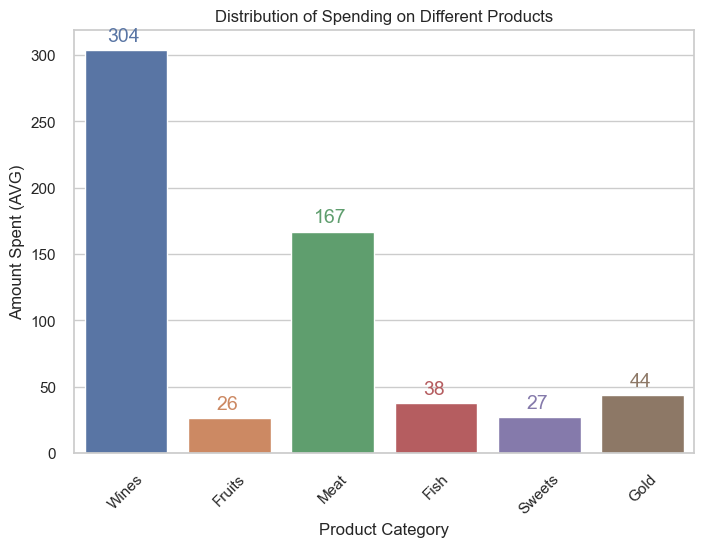

In [36]:
product_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
ax = sns.barplot(data=df_Mark[product_cols],ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Amount Spent (AVG)')
plt.title('Distribution of Spending on Different Products')
plt.show()

In [37]:
corr = df_Mark[['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].corr()
corr

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold
Income,1.000000,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978
Wines,0.576789,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
Fruits,0.428747,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
Meat,0.577802,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
Fish,0.437497,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
Sweets,0.436162,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
Gold,0.321978,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000


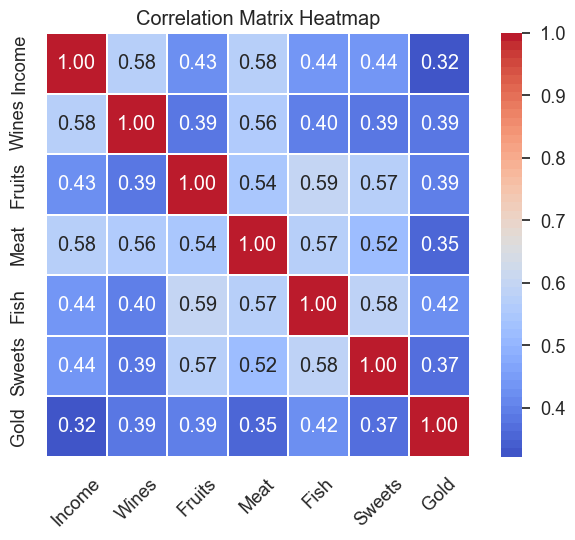

In [38]:
cmap = sns.color_palette('coolwarm', 50)
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.3, square=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()

<Figure size 600x600 with 0 Axes>

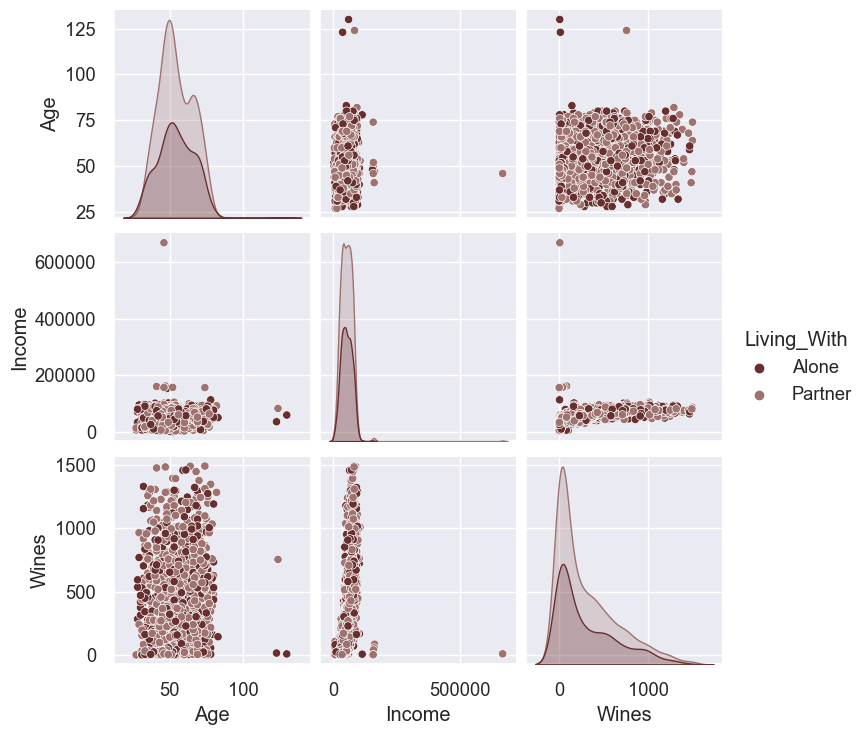

In [39]:
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F"])
plt.figure(figsize=(6,6))
sns.pairplot(df_Mark, vars=['Age', 'Income', 'Wines'], hue='Living_With', palette=cmap.colors)
plt.show()

Text(0.5, 0.92, 'Customer Spending on Wine, Meat, and Fish Products by Complain Status')

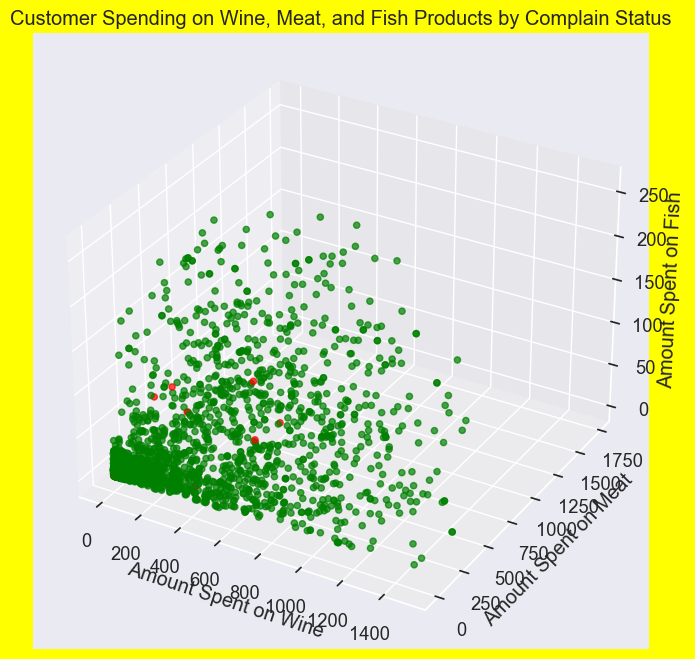

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8),facecolor ='Yellow')
ax = fig.add_subplot(111, projection='3d')

# Set the color of each data point based on 'Complain' attribute
colors = ['green' if c == 0 else 'red' for c in df_Mark['Complain']]
ax.scatter(df_Mark['Wines'], df_Mark['Meat'], df_Mark['Fish'], c=colors, alpha=0.7)

# Set axis labels and title
ax.set_xlabel('Amount Spent on Wine')
ax.set_ylabel('Amount Spent on Meat')
ax.set_zlabel('Amount Spent on Fish')
ax.set_title('Customer Spending on Wine, Meat, and Fish Products by Complain Status')

# Promotional Activities

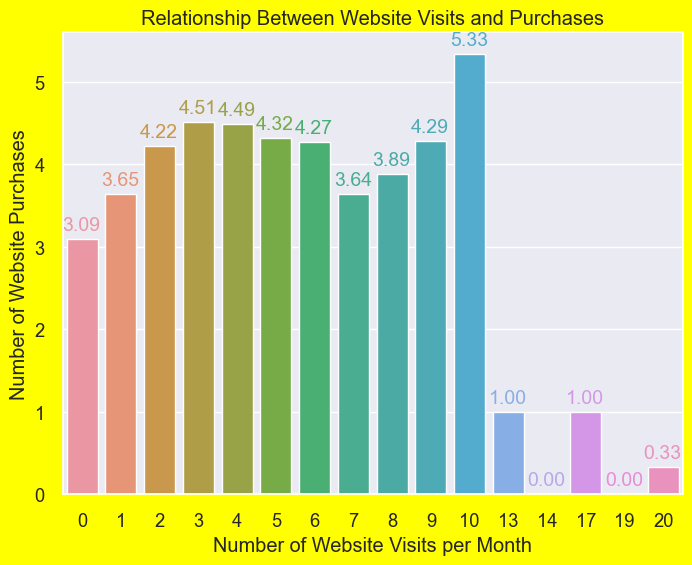

In [49]:
fig = plt.figure(figsize=(8, 6),facecolor ='Yellow')
ax = sns.barplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df_Mark,ci=None)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xlabel('Number of Website Visits per Month')
plt.ylabel('Number of Website Purchases')
plt.title('Relationship Between Website Visits and Purchases')
plt.show()

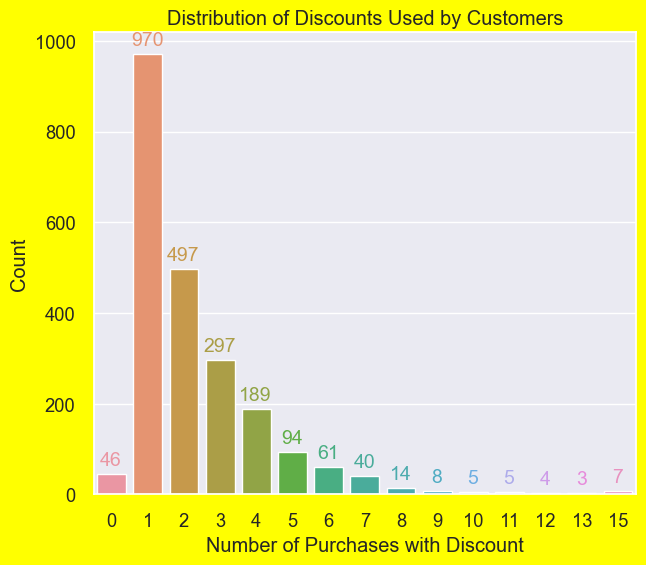

In [42]:
fig = plt.figure(figsize=(7, 6),facecolor ='Yellow')
ax = sns.countplot(data=df_Mark,x='NumDealsPurchases')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xlabel('Number of Purchases with Discount')
plt.ylabel('Count')
plt.title('Distribution of Discounts Used by Customers')
plt.show()

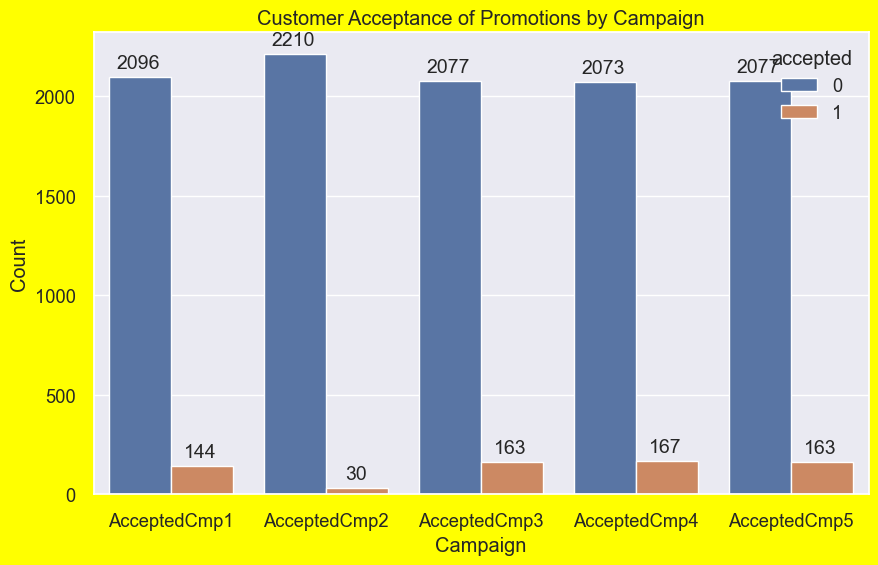

In [43]:
# Create a subset of the DataFrame with the desired columns
promo_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Reshape the data into a long format
promo_data = pd.melt(df_Mark[promo_cols], var_name='campaign', value_name='accepted')

fig = plt.figure(figsize=(10, 6),facecolor ='Yellow')
ax = sns.countplot(x='campaign', hue='accepted', data=promo_data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14)

plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Customer Acceptance of Promotions by Campaign')
plt.show()

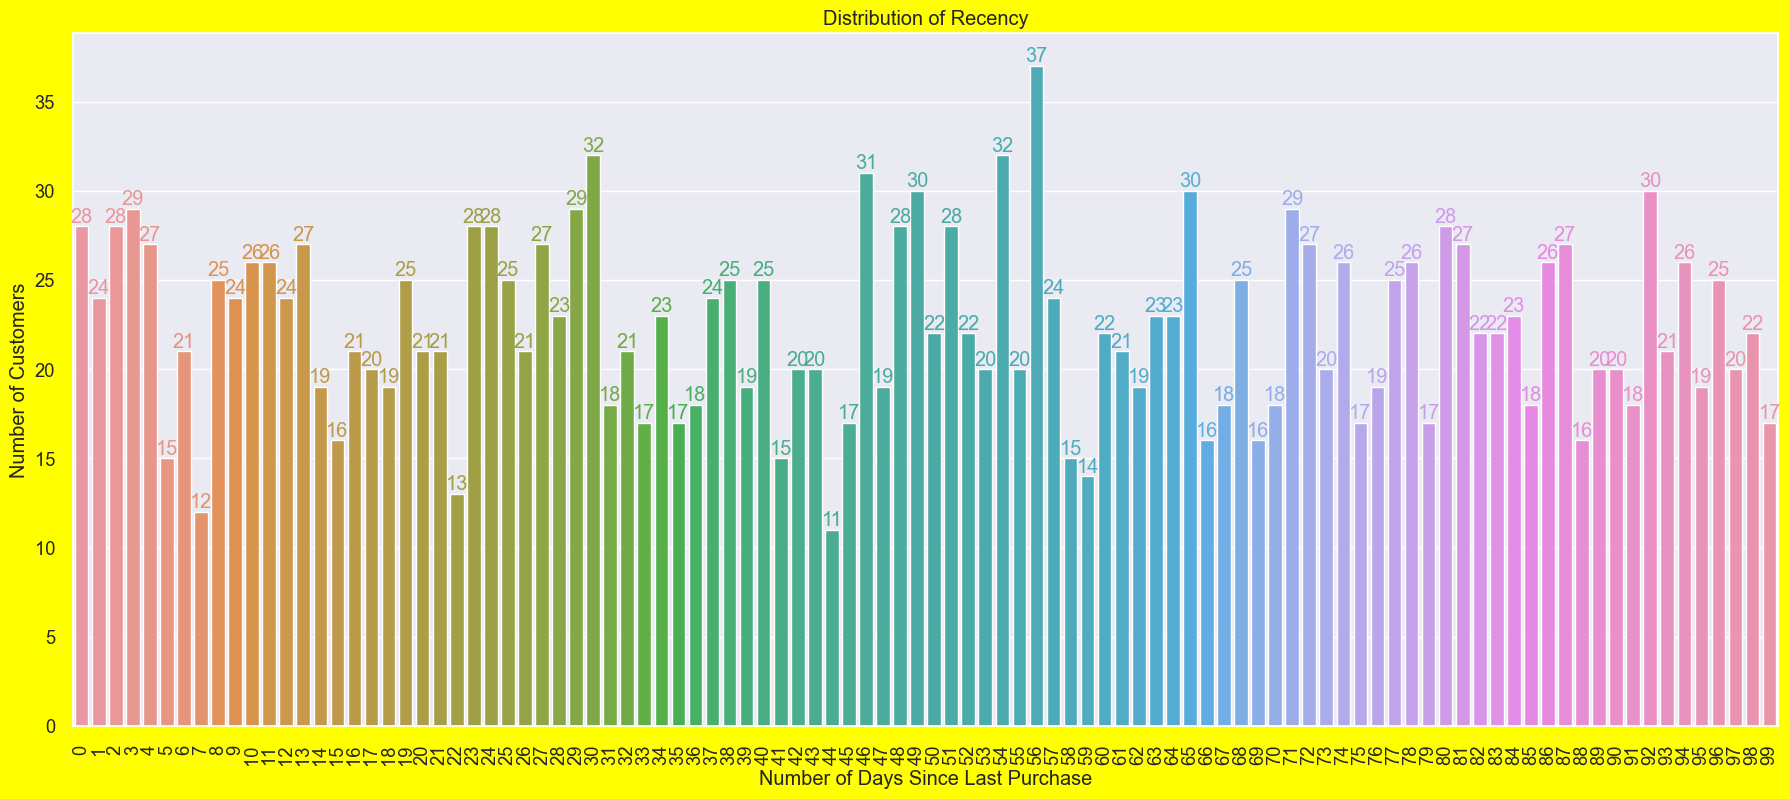

In [61]:
# Create count plot with 'Recency' on the x-axis
plt.figure(figsize=(22,9),facecolor='Yellow')
sns.countplot(data=df_Mark, x='Recency')

plt.xlabel('Number of Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Distribution of Recency')
plt.xticks(rotation=90)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height, int(height), ha='center', va='bottom',color=p.get_facecolor())
plt.show()

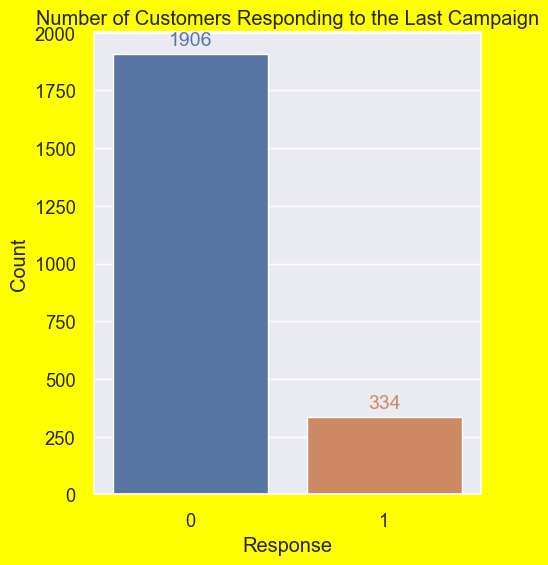

In [62]:
# Countplot for Response
plt.figure(figsize=(5, 6),facecolor='yellow')
# Create the count plot
ax = sns.countplot(data=df_Mark, x='Response')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Number of Customers Responding to the Last Campaign')
plt.show()

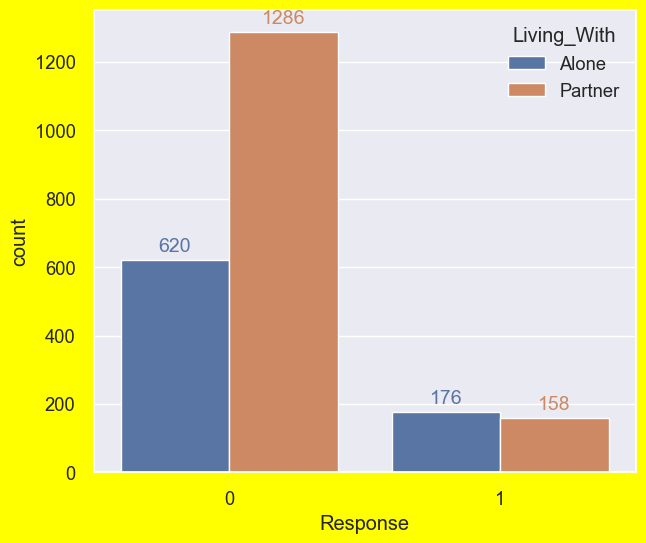

In [63]:
plt.figure(figsize=(7,6),facecolor='yellow')
ax=sns.countplot(x='Response', hue='L0iving_With', data=df_Mark)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.show()